# Testing Week 5

In [295]:
!pwd

/Users/emilyng/Documents/CP3108B/SliTraNet_repo_and_data/SliTraNet_implementation


In [301]:
from emily_helper_functions.video_reader import get_frames_as_tensor
video_path = '../videos/test/next_6mins_lec03.mp4'
frames = get_frames_as_tensor(video_path, "MoviePy", 1)
print(type(frames[0]))

number of frames returned is 404
<class 'torch.Tensor'>


In [302]:
frames[0].shape # torch.Size([1080, 1920, 3]) for own 1010A , # torch.Size([360, 640, 3]) for next_6 mins

torch.Size([360, 640, 3])

# Pytorch tests

In [ ]:
import torchvision.io.video as video
import torch.nn.functional as F
## kernel dies if I test on videos that are ~ 30 mins long
# Read the video and convert it into PyTorch tensors
frames_2, audio_2, info_2 = video.read_video(video_path_2, pts_unit="sec")

# Using Open CV to read videos

8 mins is also 14603 frames, and can apply torch.as_tensor() on frame to convert to tensor

In [305]:
import cv2
import torch
from moviepy.editor import VideoFileClip

def get_frames_as_tensor(path, library='MoviePy', frame_per_sec= None,):
    '''
    input: video path name
    output: list of video frames in tensor format
    '''
    frame_as_tensor = []

    if library=='MoviePy':
        # Create a VideoFileClip object from the input video
        video_clip = VideoFileClip(path) # returns video.io VideoFileClip 
        # default is sth like 30fps, can check using video_clip.fps
        if not frame_per_sec:
            frame_per_sec = video_clip.fps 

        for frame in video_clip.iter_frames(fps=frame_per_sec): 
            frame_as_tensor.append(frame) #torch.as_tensor(frame))
            # returns a NUMPY ARRAY, each of size [360, 640, 3], instead of tensor which will automatically become [3, 640, 360]
    
    elif library=='cv2': #cv2
        cap = cv2.VideoCapture(path)
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
        for i in range(length):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i) # starts counting from 0
            ret, frame = cap.read()
            frame_as_tensor.append(torch.as_tensor(frame))
    
    else:
        raise ValueError("set library='MoviePy' or 'cv2' ")
    print(f"number of frames returned is {len(frame_as_tensor)}")
    return frame_as_tensor

#video_path = '../videos/test/trimmed_vid_lec_03.mp4' 
#video_path = '../videos/test/next_6mins_lec03.mp4'
#video_path = '../videos/test/last_half_lec03.mp4'
#video_path = '../videos/test/lec06.mp4'
video_path = '../videos/test/own_CS1010A_tut4_short.mp4'
array_of_frames = get_frames_as_tensor(video_path, 'MoviePy', 1)

number of frames returned is 183


# Show results

In [307]:

trim1, trim2, trim3 = 'trimmed_vid_lec_03', 'next_6mins_lec03', 'last_half_lec03'
full03, full06, own = 'lec03', 'lec06', 'own_CS1010A_tut4_short'

def generate_frame_array(vid_name, array_of_frames, result_type):
    video_frame_start, video_frame_end, static_slide_start, static_slide_end = [], [], [], []

    # Slide/Video Detection
    if 'slide_vid':
        file_results = open(f'results/test/resnet18_gray/{vid_name}_results.txt', 'r')
        
    else: # transition detection
        file_results = open(f'results/test/SliTraNet-gray-RGB/{vid_name}_transitions.txt', 'r')

    Lines = file_results.readlines()

    count = 0

    # Strips the newline character
    for line in Lines:
        if count == 0:
            count += 1
            pass
        else:
            count += 1
            res = list(map(lambda x: int(x.strip()), line.split(',')))

            if 'slide_vid':
                video_frame_start.append(res[1])
                video_frame_end.append(res[2])
            
            else: 
                if res[0] == -1: # video frame
                    video_frame_start.append(res[1])
                    video_frame_end.append(res[2])
                else:
                    static_slide_start.append(res[1])
                    static_slide_end.append(res[2])

    return video_frame_start, video_frame_end, static_slide_start, static_slide_end

## video_frame -1 does not have values for last part of lecture, wheras static slide does
# theory: sattic slide detects changes but not past! Because this lecture cuts in and out.. 

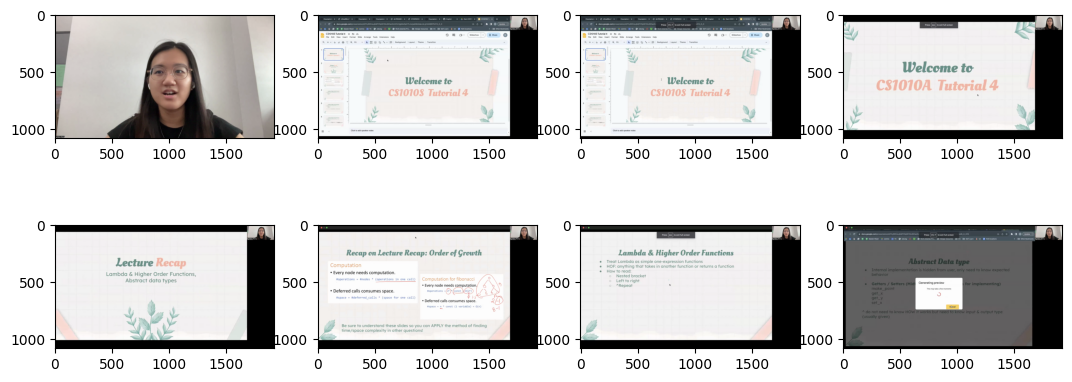

In [309]:
from matplotlib import pyplot as plt

N = len(video_frame_start)
fig, axes = plt.subplots(round(N//4),4, figsize=(13,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(array_of_frames[video_frame_start[i]-1])
plt.show()

In [135]:
print("new test result at 1 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

new test result at 2 fps
video_frame_start indexes [25, 56, 139, 181]
video_frame_end indexes [26, 58, 141, 183]


In [114]:
print("old test result at 2 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

old test result at 2 fps
video_frame_start indexes [28, 49, 70, 89, 110, 161, 276, 307, 360, 625]
video_frame_end indexes [30, 50, 73, 90, 114, 162, 280, 308, 363, 626]


In [285]:
print("result at 1 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

result at 1 fps
video_frame_start indexes [1, 30, 99, 147, 204, 231, 292, 462, 579, 1184, 1301, 1370, 1443, 1615, 1651, 1697, 2113]
video_frame_end indexes [25, 60, 121, 164, 217, 250, 310, 490, 591, 1198, 1351, 1384, 1469, 1631, 1664, 1731, 2134]


In [265]:
(array_of_frames[440]==array_of_frames[440-1]).all()

False

IndexError: list index out of range

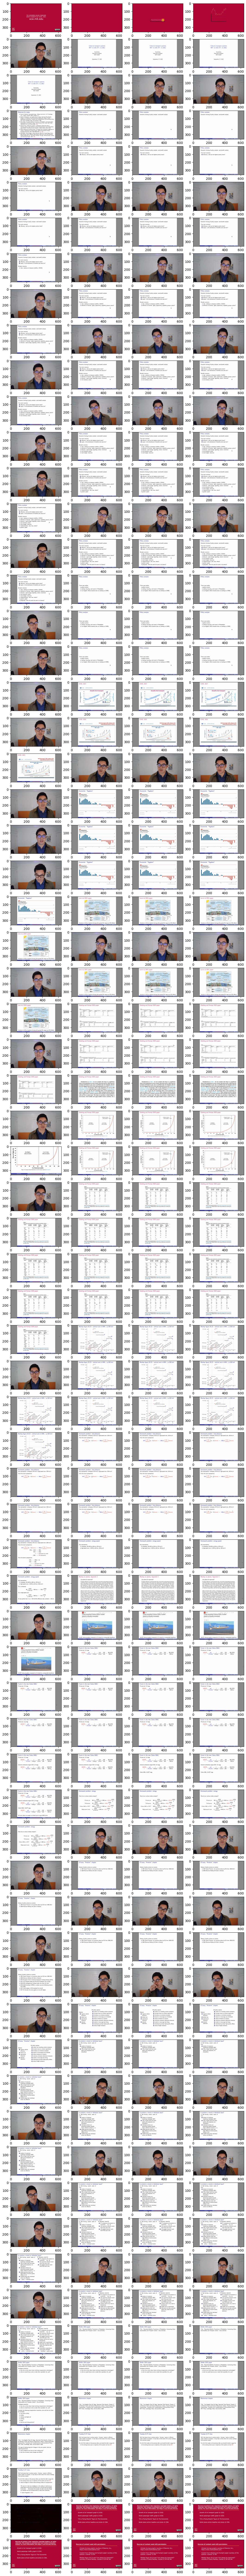

In [289]:
N = len(video_frame_start) * 4
fig, axes = plt.subplots(round(N//4),4, figsize=(13,len(video_frame_start)*2))
for row in range(N):
    for col in range(4):
        indx = (video_frame_start[row])-2+col # start at the frame before transition detected
        axes[row, col].imshow(array_of_frames[indx])
plt.show()

In [ ]:
N = 16
fig, axes = plt.subplots(round(N//4),4, figsize=(13,10))
for i,ax in enumerate(axes.flat):
    indx = (video_frame_start[i])-2+j
    ax.imshow(lst_8min[indx])
plt.show()

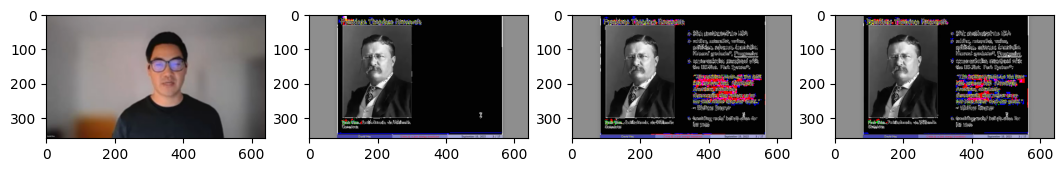

In [134]:
N = len(video_frame_end)
fig, axes = plt.subplots(round(N//4),4, figsize=(13,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(lst_8min[video_frame_end[i]]+5)
plt.show()

In [120]:
import numpy as np
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_static_slide_5_361.jpg', np.array(lst_8min[360]))

True

In [ ]:
# to write array to jpg and display
cap.set(cv2.CAP_PROP_POS_FRAMES, 64355)
ret, frame = cap.read()
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_frame_49.jpg', frame)

True

# Using MoviePy

In [ ]:
import torch
import torchvision.transforms as transforms
from moviepy.editor import VideoFileClip

# Create a VideoFileClip object from the input video
video_clip = VideoFileClip(video_path_30min) # returns video.io VideoFileClip # 30 fps
print(video_clip.fps)
frame_as_tensor = []
for frame in video_clip.iter_frames(fps=10):  # instead of video_clip.fps
    frame_as_tensor.append(torch.as_tensor(frame))

30.0


In [ ]:
frame_as_tensor_3fps = []
for frame in video_clip.iter_frames(fps=3):
    frame_as_tensor_3fps.append(torch.as_tensor(frame))

# Pytorch changing width & height

In [ ]:

# Desired width and height
desired_width = 640
desired_height = 480
# Resize each frame to the desired dimensions
resized_frames = [F.interpolate(frame.permute(2, 0, 1).unsqueeze(0), size=(desired_height, desired_width), mode="bilinear", align_corners=False).squeeze(0).permute(1, 2, 0) for frame in frames]


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
import torch
torch.set_default_device("mps")
tnsr = torch.tensor([1, 2, 3])
tnsr.get_device()

0

In [ ]:
new = tnsr.to('cpu') # -1
new.get_device()
new = new.to('mps')
new.get_device()

0

In [ ]:
try:
    a = 'asf'
    print(int(a))
except ValueError as err:
    if str(err) == "invalid literal for int() with base 10: 'abcde'":
            a = 123
            print(int(a))
    else:
         print(a)

asf


In [ ]:
import torchvision.transforms as T
from PIL import Image
from matplotlib import pyplot as plt
# define a transform to convert a tensor to PIL image
#transform = T.ToPILImage()
# convert the tensor to PIL image using above transform
#img = transform(lst_8min[0])
# display the PIL image
#img.show()